# Practical Statistics for Data Scientists (Python)
# Exploratory Data Analysis
> (c) 2019 Peter C. Bruce, Andrew Bruce, Peter Gedeck

Importe los paquetes de Python necesarios.

In [1]:
%matplotlib inline


from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

Definir rutas a conjuntos de datos. Si no mantiene sus datos en el mismo directorio que el código, adapte los nombres de las rutas.

In [3]:
AIRLINE_STATS_CSV ='datos/airline_stats.csv'
KC_TAX_CSV ='datos/kc_tax.csv.gz'
LC_LOANS_CSV ='datos/lc_loans.csv'
AIRPORT_DELAYS_CSV ='datos/dfw_airline.csv'
SP500_DATA_CSV ='datos/sp500_data.csv.gz'
SP500_SECTORS_CSV ='datos/sp500_sectors.csv'
STATE_CSV ='datos/state.csv'

# Estimaciones de ubicación
## Ejemplo: Estimaciones de ubicación de las tasas de población y homicidios

In [4]:
# Table 1-2
state = pd.read_csv(STATE_CSV)
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE



Calcule la media, la media recortada y la mediana de la población. Para `media` y `mediana` podemos usar los métodos _pandas_ del data frame. La media recortada requiere la función `trim_mean` en _scipy.stats_.

In [5]:
print('Promedio:', state['Population'].mean())
print('Mediana:', state['Population'].median())
print('Media Recortada:', trim_mean(state['Population'], 0.1))


Promedio: 6162876.3
Mediana: 4436369.5
Media Recortada: 4783697.125


La media ponderada está disponible con numpy. Para la mediana ponderada, podemos usar el paquete especializado `wquantiles` (https://pypi.org/project/wquantiles/).

In [6]:
print(wquantiles.quantile(state['Population'], state['Murder.Rate'], 0.5))

4705739.504132231


# Estimates of Variability

In [ ]:
# Table 1-2
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


Standard deviation

In [7]:
state['Population'].std()

6848235.347401142

El rango intercuartil se calcula como la diferencia del cuantil 75% y 25%.

In [8]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

La desviación absoluta de la mediana de la mediana se puede calcular con un método en _statsmodels_

In [9]:
robust.scale.mad(state['Population'])

3849876.1459979336

## Percentiles and Boxplots
_Pandas_ tiene el método `quantile` para data frames

In [9]:
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


In [10]:
# Table 1.4
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


_Pandas_ proporciona una serie de tramas exploratorias básicas; uno de ellos son diagramas de caja

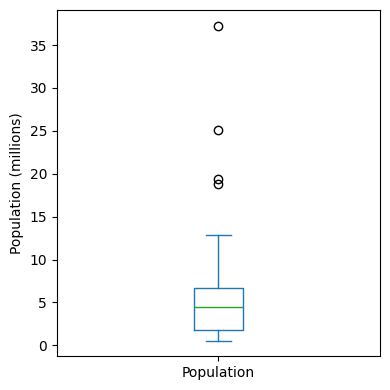

In [7]:
ax = (state['Population']/1_000_000).plot.box(figsize=(4, 4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

Lo mismo que lo anterior pero con seaborn

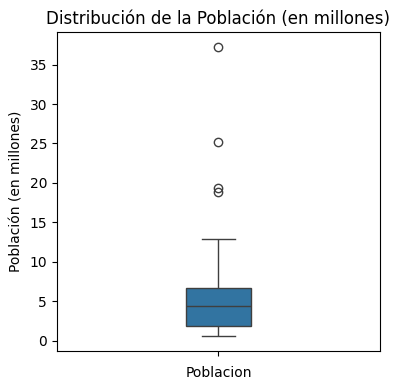

In [8]:
plt.figure(figsize=(4, 4))

ax = sns.boxplot(data=state['Population']/1_000_000, width=0.2)
ax.set_title('Distribución de la Población (en millones)')
ax.set_xlabel('Poblacion')
ax.set_ylabel('Población (en millones)')

plt.tight_layout()

plt.show()

## Frequency Table and Histograms
El método `cut` para datos _pandas_ divide el conjunto de datos en contenedores. Hay una serie de argumentos para el método. El siguiente código crea contenedores de igual tamaño. El método `value_counts` devuelve una tabla de frecuencia.

In [11]:
binnedPopulation = pd.cut(state['Population'], 10)
print(binnedPopulation.value_counts())

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64


In [12]:
# Table 1.5
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups))

                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

C:\Users\Eitan\AppData\Local\Temp\ipykernel_4704\3642716170.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group, subset in df.groupby(by='binnedPopulation'):


_Pandas_ también admite histogramas para el análisis exploratorio de datos.

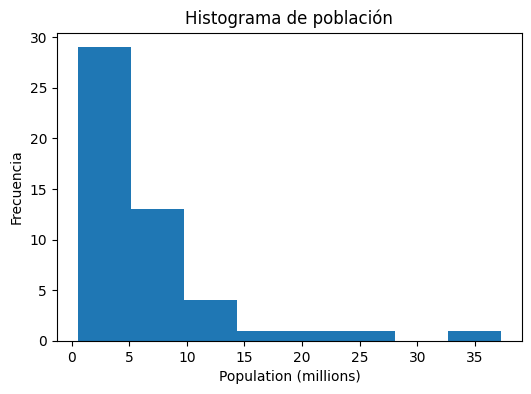

In [13]:
#Genere un Histograma
fig, ax = plt.subplots(figsize = (6, 4))
ax.hist(state["Population"]/1_000_000, bins = 8)

plt.xlabel("Population (millions)")
plt.ylabel("Frecuencia")
plt.title("Histograma de población");

El histograma quiere decir no muchos estados tienen grandes millones de población, ya que la gran mayoria tiene menor a 15 millones

## Density Estimates
La densidad es una alternativa a los histogramas que puede proporcionar más información sobre la distribución de los puntos de datos. Utilice el argumento `bw_method` para controlar la suavidad de la curva de densidad.

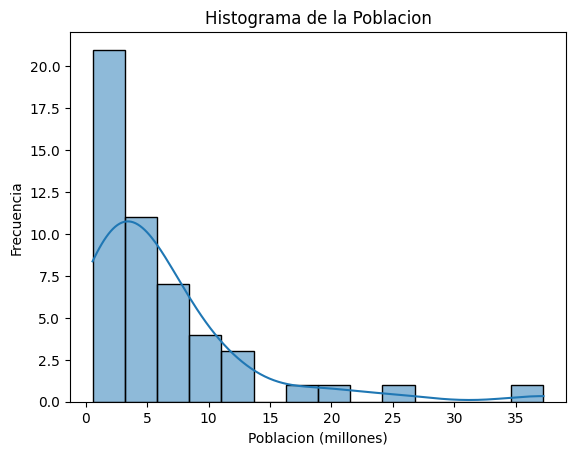

In [35]:
# Genere un Histograma y la línea de tendencia
sns.histplot(state['Population']/1_000_000, kde=True)
plt.xlabel('Poblacion (millones)')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Poblacion')
plt.show()

# Exploring Binary and Categorical Data

In [16]:
# Table 1-6
dfw = pd.read_csv(AIRPORT_DELAYS_CSV)
print(100 * dfw / dfw.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


_Pandas_ también admite gráficos de barras para mostrar una sola variable categórica.

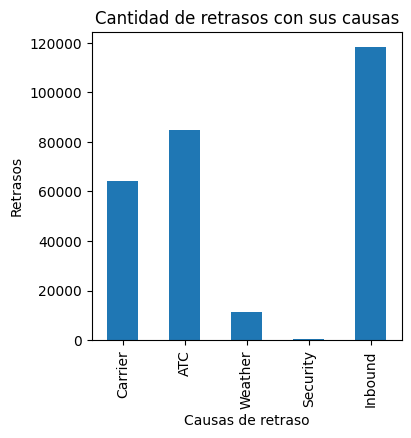

In [25]:
#Genere un gráfico de barras
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Causas de retraso')
ax.set_ylabel('Retrasos')

plt.title('Cantidad de retrasos con sus causas')
plt.show()

# Correlation
Primera lectura de los datasets

In [26]:
sp500_sym = pd.read_csv(SP500_SECTORS_CSV)
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)

In [27]:
# Table 1-7
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


A continuación, nos centramos en los fondos negociados en las principales bolsas (sector == 'etf').

In [29]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

                 XLI       QQQ       SPY       DIA       GLD    VXX       USO  \
2012-07-02 -0.376098  0.096313  0.028223 -0.242796  0.419998 -10.40  0.000000   
2012-07-03  0.376099  0.481576  0.874936  0.728405  0.490006  -3.52  0.250000   
2012-07-05  0.150440  0.096313 -0.103487  0.149420  0.239991   6.56 -0.070000   
2012-07-06 -0.141040 -0.491201  0.018819 -0.205449 -0.519989  -8.80 -0.180000   
2012-07-09  0.244465 -0.048160 -0.056445 -0.168094  0.429992  -0.48  0.459999   

                 IWM       XLE       XLY       XLU       XLB       XTL  \
2012-07-02  0.534641  0.028186  0.095759  0.098311 -0.093713  0.019076   
2012-07-03  0.926067  0.995942  0.000000 -0.044686  0.337373  0.000000   
2012-07-05 -0.171848 -0.460387  0.306431 -0.151938  0.103086  0.019072   
2012-07-06 -0.229128  0.206706  0.153214  0.080437  0.018744 -0.429213   
2012-07-09 -0.190939 -0.234892 -0.201098 -0.035751 -0.168687  0.000000   

                 XLV       XLP       XLF       XLK  
2012-07-02 -0.0

Debido a la gran cantidad de columnas en esta tabla, mirar la matriz de correlación es engorroso y es más conveniente trazar la correlación como un mapa de calor. El paquete _seaborn_ proporciona una implementación conveniente para los mapas de calor.

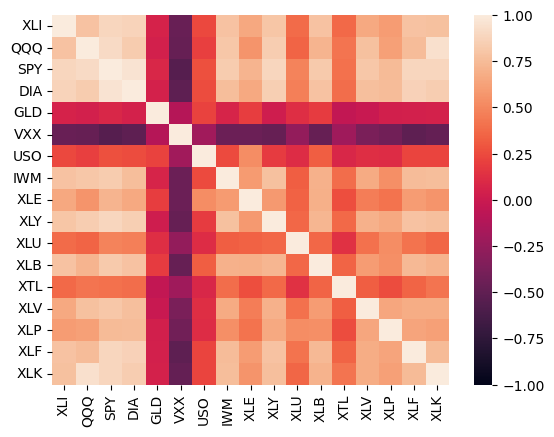

In [38]:
#Genere un mapa de calor
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1)
plt.show()

Significa que mientras mas cerca este a 1 las variables proporcionales, mientras mas al -1 son inversamente proporcionales

## Scatterplots
Los diagramas de dispersión simples son compatibles con _pandas_. Especificar el marcador como `$\u25EF$` usa un círculo abierto para cada punto.

In [ ]:
# Genere un gráfico de Correlación entre ATT vs VERIZON

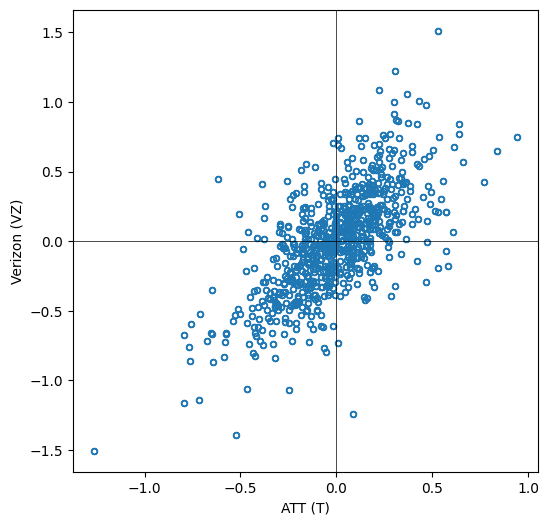

In [44]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(6, 6), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='black', lw=0.5)
ax.axvline(0, color='black', lw=0.5)

plt.show()

## Two Categorical Variables
Carge el dataset `lc_loans`


In [45]:
lc_loans = pd.read_csv(LC_LOANS_CSV)

In [46]:
# Table 1-8(1)
crosstab = lc_loans.pivot_table(index='grade', columns='status',
                                aggfunc=lambda x: len(x), margins=True)
print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [47]:
# Table 1-8(2)
df = crosstab.copy().loc['A':'G',:]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
print(perc_crosstab)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


C:\Users\Eitan\AppData\Local\Temp\ipykernel_4704\1742275820.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.0215478  0.04005439 0.04982834 0.06740983 0.08165728 0.1182579
 0.12619562]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
C:\Users\Eitan\AppData\Local\Temp\ipykernel_4704\1742275820.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.69045386 0.70901262 0.73570217 0.71732838 0.70793587 0.65437074
 0.61400802]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
C:\Users\Eitan\AppData\Local\Temp\ipykernel_4704\1742275820.py:3: FutureWarning: Setting an item of incompatible dtype 

## Categorical and Numeric Data
Los diagramas de caja _Pandas_ de una columna se pueden agrupar por una columna diferente.

In [67]:
air_stat = pd.read_csv(AIRLINE_STATS_CSV)

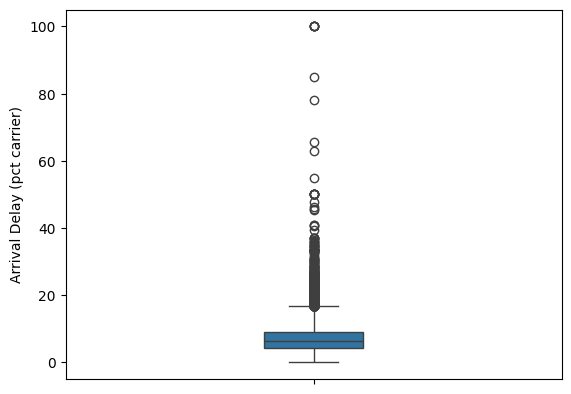

In [61]:
# Genere un diagrama de caja de pct_carrier_delay para todas las líneas aéreas
ax = sns.boxplot(data=air_stat, y='pct_carrier_delay', width=0.2)
ax.set_ylabel('Arrival Delay (pct carrier)')

plt.show()

['Alaska', 'American', 'Delta', 'Jet Blue', 'Southwest', 'United']


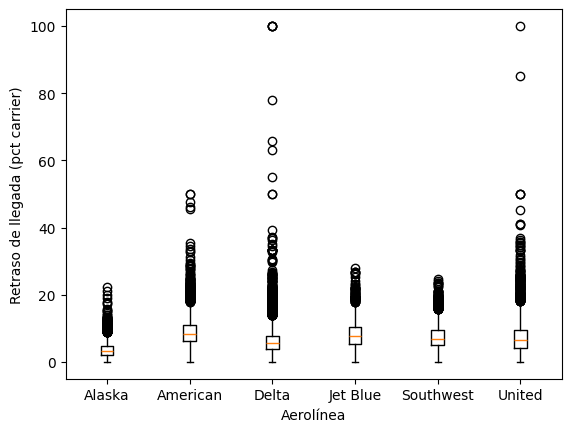

In [73]:
grouped = air_stat.groupby('airline')

fig, ax = plt.subplots()
positions = range(len(grouped))
labels = []

for position, (name, group) in enumerate(grouped):
    ax.boxplot(group['pct_carrier_delay'].fillna(0), positions=[position])
    labels.append(name)

ax.set_xlabel('Aerolínea')
ax.set_ylabel('Retraso de llegada (pct carrier)')
ax.set_xticks(positions)
ax.set_xticklabels(labels)

print(labels)

plt.show()

Debido a que faltan solo 28 datos de 33.468 decidi cambiar los nulos a 0 debido a que no tendrá gran impacto en el resultado.

_Pandas_ también admite una variación de diagramas de caja llamada _violinplot_.

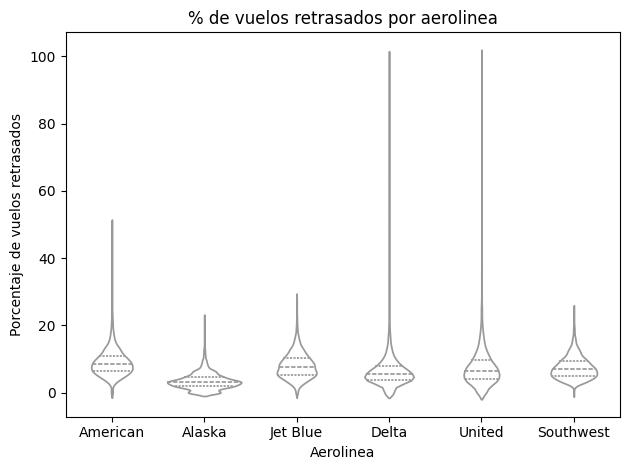

In [76]:

ax = sns.violinplot(x='airline', y='pct_carrier_delay', data=air_stat, inner='quartile', color='white')

ax.set_xlabel('Aerolinea')
ax.set_ylabel('Porcentaje de vuelos retrasados')
plt.title('% de vuelos retrasados por aerolinea')

plt.tight_layout()
plt.show()